**Pertemuan 6**\
**Klasifikasi dengan K-NN**\
Hans Valerian Lenice\
A11.2021.13338

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
dataset = pd.read_csv('Social Network Ads.csv')

In [4]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,35,39000,0
1,15810944,Male,49,74000,0
2,15668575,Female,39,134000,1
3,15603246,Female,41,71000,0
4,15804002,Male,58,101000,1


In [5]:
x = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:, -1].values

In [6]:
print(x)

[[    35  39000]
 [    49  74000]
 [    39 134000]
 [    41  71000]
 [    58 101000]
 [    47  47000]
 [    55 130000]
 [    52 114000]
 [    40 142000]
 [    46  22000]
 [    48  96000]
 [    52 150000]
 [    59  42000]
 [    35  58000]
 [    47  43000]
 [    60 108000]
 [    49  65000]
 [    40  78000]
 [    46  96000]
 [    59 143000]
 [    41  80000]
 [    35  91000]
 [    37 144000]
 [    60 102000]
 [    35  60000]
 [    37  53000]
 [    36 126000]
 [    56 133000]
 [    40  72000]
 [    42  80000]
 [    35 147000]
 [    39  42000]
 [    40 107000]
 [    49  86000]
 [    38 112000]
 [    46  79000]
 [    40  57000]
 [    37  80000]
 [    46  82000]
 [    53 143000]
 [    42 149000]
 [    38  59000]
 [    50  88000]
 [    56 104000]
 [    41  72000]
 [    51 146000]
 [    35  50000]
 [    57 122000]
 [    41  52000]
 [    35  97000]
 [    44  39000]
 [    37  52000]
 [    48 134000]
 [    37 146000]
 [    50  44000]
 [    52  90000]
 [    41  72000]
 [    40  57000]
 [    58  9500

In [7]:
print(y)

[0 0 1 0 1 0 1 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1 1 1 0 0 1 1 0 1 1 0 1 1 0 1 0
 0 0 1 1 0 1 1 0 1 0 1 0 1 0 0 1 1 0 1 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 1 1 1
 1 1 0 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 0 0 0 1 1 0 1 1 1 1 1 0 0 0 1 1 0 0
 1 0 1 0 1 1 0 1 0 1 1 0 1 1 0 0 0 1 1 0 1 0 0 1 0 1 0 0 1 1 0 0 1 1 0 1 1
 0 0 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 1 0 1 1 1 1
 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [9]:
print(x_train)

[[    24  32000]
 [    35  72000]
 [    38  61000]
 [    42  54000]
 [    35  88000]
 [    19  85000]
 [    35  61000]
 [    20  74000]
 [    37  57000]
 [    35  44000]
 [    42  73000]
 [    37  78000]
 [    35  25000]
 [    35  91000]
 [    18  86000]
 [    47  25000]
 [    32 117000]
 [    35  97000]
 [    26  72000]
 [    30  89000]
 [    55  39000]
 [    45  22000]
 [    27  90000]
 [    21  16000]
 [    25  22000]
 [    38  65000]
 [    37 144000]
 [    29  83000]
 [    26  15000]
 [    38  71000]
 [    38 113000]
 [    19  70000]
 [    40  75000]
 [    27  17000]
 [    46  28000]
 [    48  74000]
 [    37  71000]
 [    39  59000]
 [    42  65000]
 [    40  78000]
 [    42 104000]
 [    49  39000]
 [    35 147000]
 [    39  79000]
 [    32 120000]
 [    37  79000]
 [    26  30000]
 [    23  20000]
 [    35  27000]
 [    54 104000]
 [    31  58000]
 [    52 138000]
 [    35  50000]
 [    38  50000]
 [    29  80000]
 [    58 144000]
 [    34 112000]
 [    41  72000]
 [    36  3300

In [10]:
len(x_train)

300

In [11]:
len(x)

400

In [12]:
len(x_test)

100

In [13]:
len(y)

400

In [14]:
len(y_test)

100

In [15]:
len(y_train)

300

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [17]:
print(x_train)

[[-1.2885296  -1.09993546]
 [-0.18608011  0.10207032]
 [ 0.11458793 -0.22848127]
 [ 0.51547865 -0.43883228]
 [-0.18608011  0.58287264]
 [-1.789643    0.4927222 ]
 [-0.18608011 -0.22848127]
 [-1.68942032  0.16217061]
 [ 0.01436525 -0.34868184]
 [-0.18608011 -0.73933372]
 [ 0.51547865  0.13212047]
 [ 0.01436525  0.28237119]
 [-0.18608011 -1.31028647]
 [-0.18608011  0.67302307]
 [-1.88986568  0.52277235]
 [ 1.01659206 -1.31028647]
 [-0.48674815  1.45432683]
 [-0.18608011  0.85332394]
 [-1.08808423  0.10207032]
 [-0.68719351  0.61292278]
 [ 1.8183735  -0.88958445]
 [ 0.81614669 -1.40043691]
 [-0.98786155  0.64297293]
 [-1.58919764 -1.58073777]
 [-1.18830691 -1.40043691]
 [ 0.11458793 -0.10828069]
 [ 0.01436525  2.26568074]
 [-0.78741619  0.43262192]
 [-1.08808423 -1.61078792]
 [ 0.11458793  0.07202018]
 [ 0.11458793  1.33412625]
 [-1.789643    0.04197004]
 [ 0.31503329  0.19222076]
 [-0.98786155 -1.55068763]
 [ 0.91636938 -1.22013604]
 [ 1.11681474  0.16217061]
 [ 0.01436525  0.07202018]
 

In [18]:
print(x_test)

[[ 0.51547865 -0.10828069]
 [ 0.11458793  0.34247148]
 [-1.88986568 -0.01813025]
 [ 1.41748278 -1.37038676]
 [-1.18830691  0.31242134]
 [-0.18608011  0.25232105]
 [ 2.3194869  -1.03983517]
 [-1.18830691  0.55282249]
 [-0.18608011  0.19222076]
 [-1.88986568  0.40257177]
 [ 0.01436525  0.34247148]
 [ 2.01881886 -0.25853141]
 [ 1.21703742  2.1755303 ]
 [-0.78741619 -0.22848127]
 [ 2.21926422 -0.79943401]
 [ 0.81614669  1.87502886]
 [-0.78741619 -1.22013604]
 [ 1.61792814  1.06367495]
 [-0.98786155  0.46267206]
 [ 1.21703742 -0.97973488]
 [ 0.91636938  0.16217061]
 [-1.48897496 -0.16838098]
 [ 1.11681474  1.87502886]
 [-0.28630279 -1.31028647]
 [ 0.91636938 -1.09993546]
 [ 0.01436525 -0.40878213]
 [ 1.51770546 -0.91963459]
 [ 2.3194869   1.18387553]
 [-1.2885296  -0.40878213]
 [ 0.01436525  2.05532972]
 [ 2.3194869  -0.67923343]
 [-0.38652547  2.41593146]
 [-0.88763887 -0.40878213]
 [ 1.01659206 -1.46053719]
 [ 0.51547865  1.18387553]
 [ 0.11458793  0.07202018]
 [ 0.21481061  1.96517929]
 

In [19]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [20]:
y_pred = classifier.predict(x_test)

In [21]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[50 10]
 [ 1 39]]


<ipython-input-22-f48603728585>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set==j, 0], x_set[y_set==j, 1],


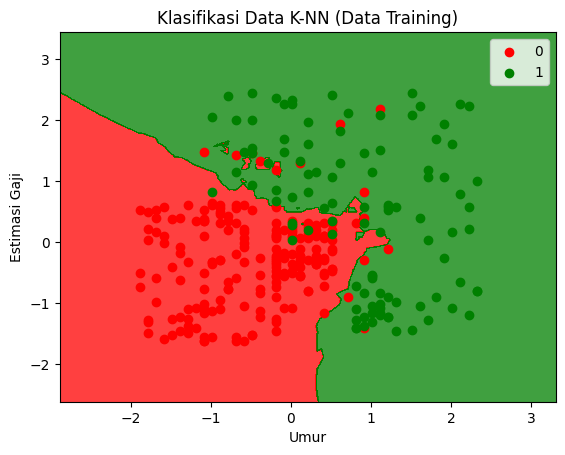

In [22]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start=x_set[:, 0].min()-1, stop=x_set[:, 0].max()+1, step=0.01),
                     np.arange(start=x_set[:, 1].min()-1, stop=x_set[:, 1].max()+1, step=0.01))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha=0.75, cmap=ListedColormap(('red','green')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i, j in enumerate (np.unique(y_set)):
  plt.scatter(x_set[y_set==j, 0], x_set[y_set==j, 1],
                    c=ListedColormap(('red','green'))(i), label=j)
plt.title('Klasifikasi Data K-NN (Data Training)')
plt.xlabel('Umur')
plt.ylabel('Estimasi Gaji')
plt.legend()
plt.show()

<ipython-input-23-6807f4967f59>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set==j, 0], x_set[y_set==j, 1],


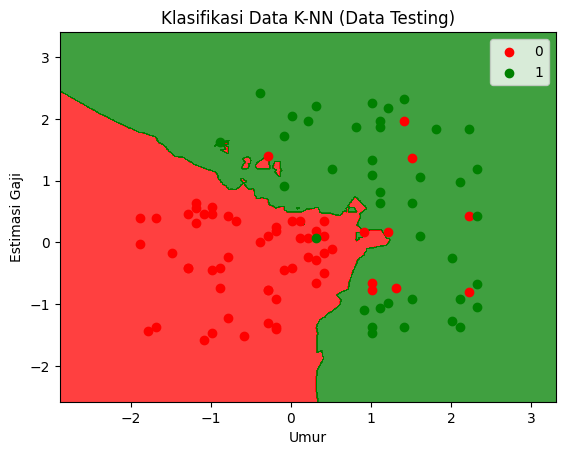

In [23]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_test, y_test
x1, x2 = np.meshgrid(np.arange(start=x_set[:, 0].min()-1, stop=x_set[:, 0].max()+1, step=0.01),
                     np.arange(start=x_set[:, 1].min()-1, stop=x_set[:, 1].max()+1, step=0.01))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha=0.75, cmap=ListedColormap(('red','green')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i, j in enumerate (np.unique(y_set)):
  plt.scatter(x_set[y_set==j, 0], x_set[y_set==j, 1],
                    c=ListedColormap(('red','green'))(i), label=j)
plt.title('Klasifikasi Data K-NN (Data Testing)')
plt.xlabel('Umur')
plt.ylabel('Estimasi Gaji')
plt.legend()
plt.show()